# S6 Demo Trabajo con mapas

En este notebook vamos a probar elementos básicos de la visualización en mapas

In [1]:
# https://geopandas.org/en/stable/
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geográficos (shapefile, GeoJSON, etc.) en un GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [2]:
# Crear un DataFrame de ejemplo con datos para cada país
data = {'Country': ['India', 'United States', 'China', 'Brazil', 'United Kingdom', "Colombia"],
        'Value': [300, 300, 300, 300, 200, 600]}
df = pd.DataFrame(data)

# Hacer un merge entre el DataFrame con datos y el GeoDataFrame
merged = world.merge(df, left_on='name', right_on='Country')
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Value
0,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",Brazil,300
1,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",Colombia,600
2,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,300
3,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",China,300
4,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,200


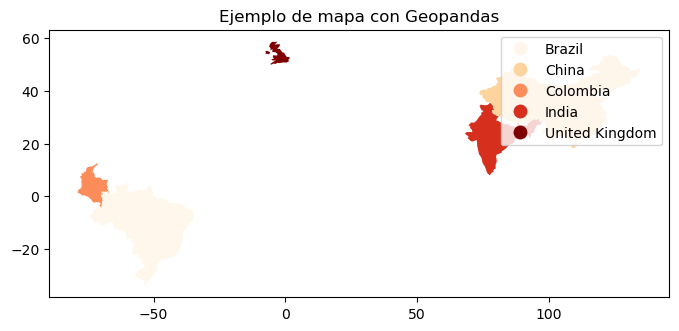

In [4]:
# Visualizar el mapa
fig, ax = plt.subplots(figsize=(8, 4))
merged.plot(column='name', cmap='OrRd', legend=True, ax=ax)
plt.title('Ejemplo de mapa con Geopandas')
plt.show()

## Visualización en Colombia

Cómo podemos hacerlo, primero usando información general (Kaggle)

https://www.kaggle.com/datasets/danielvm/coordenadas-decimales-de-ciudades-de-colombia

O directamente usando datos de DANE

https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/datos-geoestadisticos/?cod=4

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geográficos de Colombia en un GeoDataFrame
colombia = gpd.read_file('SHP_MGN2018_INTGRD_DEPTO/MGN_ANM_DPTOS.shp', encoding="UTF-8") ## Probar sin encoding
colombia.tail(2)

,DPTO_CCDGO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
31,73,TOLIMA,2018,2.413940e+10,4.034773,-75.255827,648829.0,8527.0,640302.0,8527.0,...,33115.0,418797.0,467142.0,164286.0,24120.0,58496.0,16978.0,9.549726,1.965027,"POLYGON ((-74.82173 5.31671, -74.82156 5.31653..."
32,08,ATLÁNTICO,2018,3.315752e+09,10.677010,-74.965219,753414.0,0.0,753414.0,0.0,...,45728.0,562823.0,986492.0,472743.0,43076.0,69822.0,27396.0,2.540635,0.273930,"POLYGON ((-74.84946 11.09778, -74.84938 11.097..."


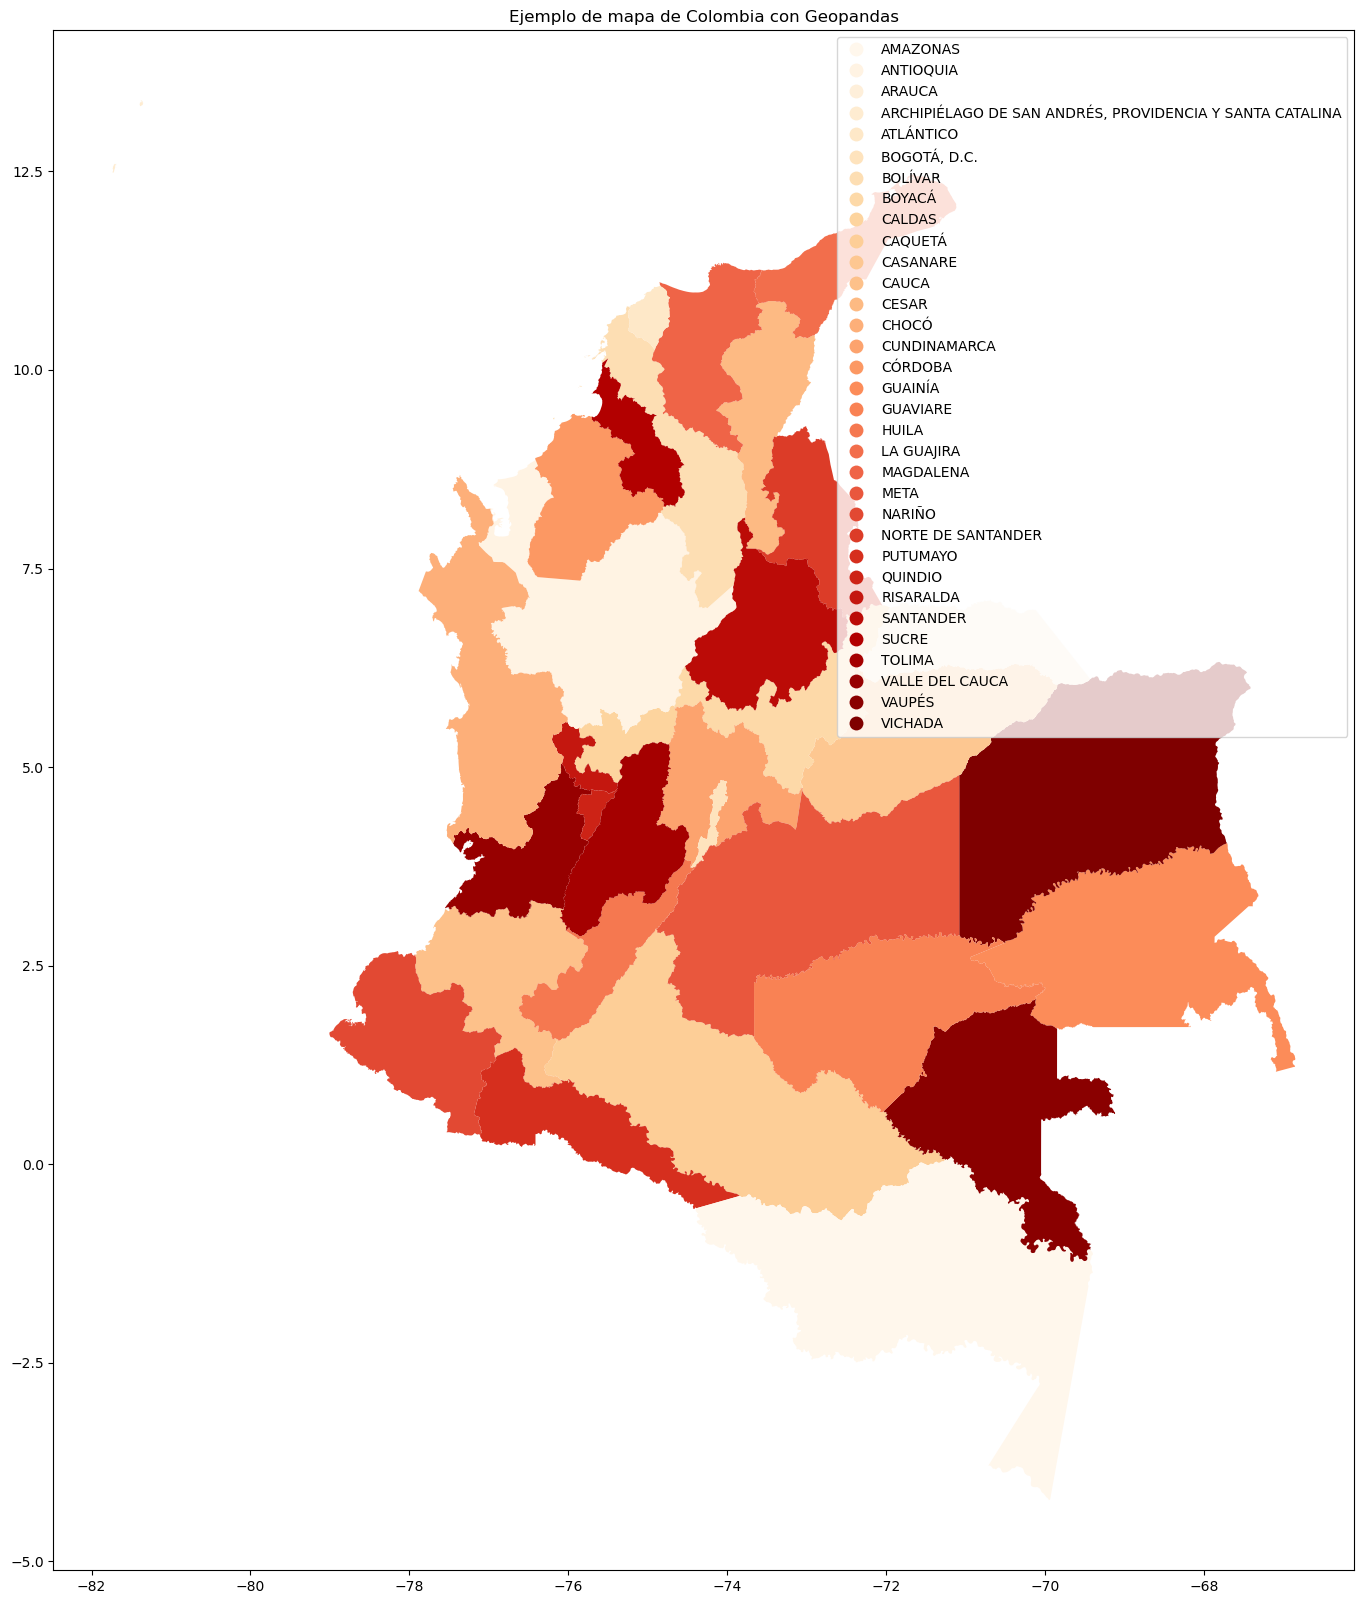

In [9]:
# Visualizar el mapa de Colombia con sus departamentos
fig, ax = plt.subplots(figsize=(20, 20))
colombia.plot(column='DPTO_CNMBR', cmap='OrRd', legend=True, ax=ax)
plt.title('Ejemplo de mapa de Colombia con Geopandas')
plt.show()

In [11]:
# Crear un DataFrame de ejemplo con datos para cada departamento
data = {'Departamento': ['HUILA', 'META', 'VALLE DEL CAUCA', 'PUTUMAYO', 'CAUCA', 'ATLÁNTICO', 'TOLIMA', 'SANTANDER' ],
        'Value': [100, 100, 100, 100, 200, 700, 100, 100]}
df = pd.DataFrame(data)

# Hacer un merge entre el DataFrame con datos y el GeoDataFrame de Colombia
merged = colombia.merge(df, left_on='DPTO_CNMBR', right_on='Departamento')
merged['Value'] = 100
merged.head(2)

,DPTO_CCDGO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry,Departamento,Value
0,19,CAUCA,2018,3.124291e+10,2.396834,-76.824233,622959.0,83033.0,539926.0,70827.0,...,449016.0,126327.0,18944.0,56673.0,17057.0,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870...",CAUCA,100
1,86,PUTUMAYO,2018,2.597628e+10,0.452260,-75.855912,147797.0,4704.0,143093.0,4659.0,...,107564.0,27821.0,4283.0,11058.0,5630.0,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730...",PUTUMAYO,100


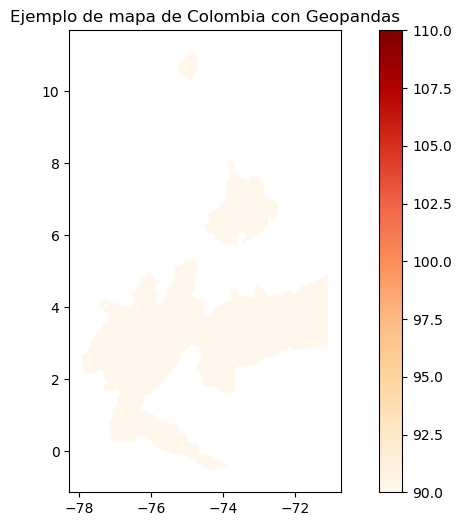

In [13]:
# Visualizar el mapa de Colombia con sus departamentos
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='Value', cmap='OrRd', legend=True, ax=ax)
plt.title('Ejemplo de mapa de Colombia con Geopandas')
plt.show()